In [1]:
# importing common libraries

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# reading dataset from csv file
dataset = pd.read_csv("data.csv")
# print(dataset)

# converting dataset to numpy array
dataset = dataset.to_numpy()

# shuffling dataset
np.random.seed(104)
np.random.shuffle(dataset)

# type(dataset)
pd.DataFrame(dataset)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.198519,0.204414,0.586364,0.155996,0.044188,-0.071939,0.073314,0.222891,-0.057976,-0.29102,...,0.226514,0.158018,-0.157749,-0.174209,-0.094841,0.132178,0.185847,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,0.39421,0.215191,0.330178,0.070227,0.05757,0.14265,0.033247,-0.182314,-0.015615,0.209041,...,-0.16568,-0.173409,0.009729,-0.002031,-0.090028,-0.032145,-0.013583,Dendrobatidae,Ameerega,Ameeregatrivittata
2,0.51551,0.436878,0.218723,0.077345,0.147385,0.026539,-0.048382,0.090239,0.097051,-0.080779,...,0.038314,-0.000197,-0.001568,0.064747,0.012804,-0.021314,0.053246,Hylidae,Hypsiboas,HypsiboasCordobae
3,0.752543,0.833542,0.400247,-0.045773,0.274972,0.058574,0.258695,0.309873,-0.186781,0.024158,...,0.10792,-0.190801,0.060883,0.101355,0.113591,-0.008522,-0.205256,Hylidae,Hypsiboas,HypsiboasCinerascens
4,0.160905,0.090873,0.540794,0.185194,0.093294,-0.114548,-0.019661,0.255814,-0.005617,-0.258027,...,0.053861,0.24603,0.03775,-0.11664,-0.1645,0.014988,0.179493,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,0.498515,0.657355,0.538646,-0.247692,-0.057267,0.432238,0.060815,-0.272202,0.137951,0.253821,...,-0.107807,0.060419,0.115881,-0.071161,-0.020473,0.051039,0.017944,Leptodactylidae,Adenomera,AdenomeraAndre
7191,0.645976,0.90087,0.445,-0.222884,0.234066,0.122204,-0.104734,0.154151,-0.037012,-0.142113,...,0.222116,-0.096894,0.032066,0.020853,0.027986,0.098787,-0.107894,Hylidae,Hypsiboas,HypsiboasCinerascens
7192,0.257567,0.074478,0.15637,0.159437,0.14518,0.072934,-0.061462,-0.08658,0.04053,0.099455,...,-0.049494,0.037186,0.064761,-0.029706,-0.077118,-0.023344,0.022463,Dendrobatidae,Ameerega,Ameeregatrivittata
7193,0.116799,0.345227,0.339231,0.145888,0.228608,0.089473,-0.177339,-0.068426,0.102934,0.058147,...,0.082766,0.120535,0.037416,-0.016695,-0.038758,-0.033255,0.073442,Hylidae,Hypsiboas,HypsiboasCordobae


In [3]:
# extracting features and labels

features = dataset[:, :6]
labels = dataset[:, -2]
# pd.DataFrame(features)

# splitting dataset into training and testing sets
split_size = int(0.2 * len(dataset))
train_x, test_x = np.split(features, [split_size])
train_y, test_y = np.split(labels, [split_size])

# combining features and labels
train = np.concatenate((train_x, train_y[:, None]), axis=1)
test = np.concatenate((test_x, test_y[:, None]), axis=1)

pd.DataFrame(train_x)

,0,1,2,3,4,5
0,0.198519,0.204414,0.586364,0.155996,0.044188,-0.071939
1,0.39421,0.215191,0.330178,0.070227,0.05757,0.14265
2,0.51551,0.436878,0.218723,0.077345,0.147385,0.026539
3,0.752543,0.833542,0.400247,-0.045773,0.274972,0.058574
4,0.160905,0.090873,0.540794,0.185194,0.093294,-0.114548
...,...,...,...,...,...,...
1434,0.37938,0.34681,0.269105,-0.025193,0.015069,0.166423
1435,0.333046,0.305864,0.530813,0.119753,0.038144,-0.050261
1436,0.379109,0.526986,0.31676,0.049796,0.215516,-0.014019
1437,0.506183,0.710849,0.638431,-0.152501,-0.025995,0.460799


In [4]:
from decision_tree.tree import Tree

dec_tree = Tree(train, 5, 3)
dec_tree.build_tree()
dec_tree.print()

4 , 1439,0.123443166
--> True:
  2 , 914,0.391607114
  --> True:
    1 , 89,0.283837768
    --> True:
      0 , 55,0.249220752
      --> True:
        3 , 25,0.295872043
        --> True:
          Predict {'Adenomera': 9, 'Dendropsophus': 7, 'Scinax': 1, 'Ameerega': 1}
        --> False:
          Predict {'Scinax': 1, 'Ameerega': 5, 'Adenomera': 1}
      --> False:
        4 , 30,-0.006282404
        --> True:
          Predict {'Rhinella': 3}
        --> False:
          Predict {'Ameerega': 24, 'Adenomera': 3}
    --> False:
      1 , 34,0.346810185
      --> True:
        2 , 14,0.269105099
        --> True:
          Predict {'Rhinella': 11}
        --> False:
          Predict {'Ameerega': 1, 'Scinax': 2}
      --> False:
        0 , 20,0.299791746
        --> True:
          Predict {'Hypsiboas': 1, 'Scinax': 3, 'Leptodactylus': 1}
        --> False:
          Predict {'Hypsiboas': 12, 'Osteocephalus': 2, 'Adenomera': 1}
  --> False:
    0 , 825,-0.016786445
    --> True:
     

In [5]:
# testing
pred_y = []
for row in test_x:
    pred_y.append(dec_tree.predict(row))
print(pred_y)
print(test_y)

# calculating accuracy
accuracy = accuracy_score(test_y, pred_y)
print("Accuracy:", accuracy)


# pd.DataFrame(test_x)

['Adenomera', 'Ameerega', 'Adenomera', 'Leptodactylus', 'Adenomera', 'Leptodactylus', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Ameerega', 'Hypsiboas', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Adenomera', 'Leptodactylus', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Ameerega', 'Hypsiboas', 'Ameerega', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Leptodactylus', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Ameerega', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Rhinella', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Adenomera', 'Leptodactylus', 'Hypsiboas', 'Adenomera', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Hypsiboas', 'Adenomera', 'Adenomera

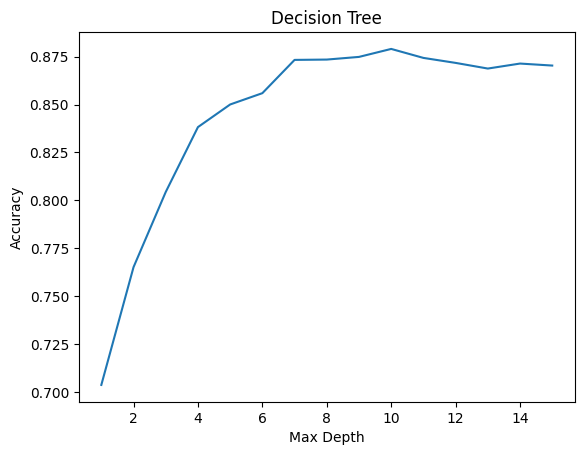

In [6]:
dec_tree_accuracies = []
max_depths = []
for md in range(1, 16):
    dec_tree = Tree(train, md, 3)
    dec_tree.build_tree()
    pred_y = []
    for row in test_x:
        pred_y.append(dec_tree.predict(row))
    accuracy = accuracy_score(test_y, pred_y)
    # print("Max Depth:", md, "Accuracy:", accuracy)
    max_depths.append(md)
    dec_tree_accuracies.append(accuracy)

plt.plot(max_depths, dec_tree_accuracies)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree")
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [9]:
# splitting dataset into features and labels
mfcc = [row[:21] for row in dataset]
labels = dataset[:, -2]

# splitting into training and testing sets in 80:20 ratio
splitsize = int(0.8 * len(dataset))
# train_x_big, test_x_big = np.split(mfcc, [splitsize])
# train_y_big, test_y_big = np.split(labels, [splitsize])

train_x_big, test_x_big, train_y_big, test_y_big = train_test_split(
    mfcc, labels, test_size=0.2
)

#### Decision Tree


In [10]:
# decision tree

dec_tree_accuracies_sklearn = []

for md in range(1, 16):
    dec_tree = DecisionTreeClassifier(max_depth=md)
    dec_tree.fit(train_x_big, train_y_big)
    pred_y = dec_tree.predict(test_x_big)
    accuracy = accuracy_score(test_y_big, pred_y)
    # print("Max Depth:", md, "Accuracy:", accuracy)
    dec_tree_accuracies_sklearn.append(accuracy)

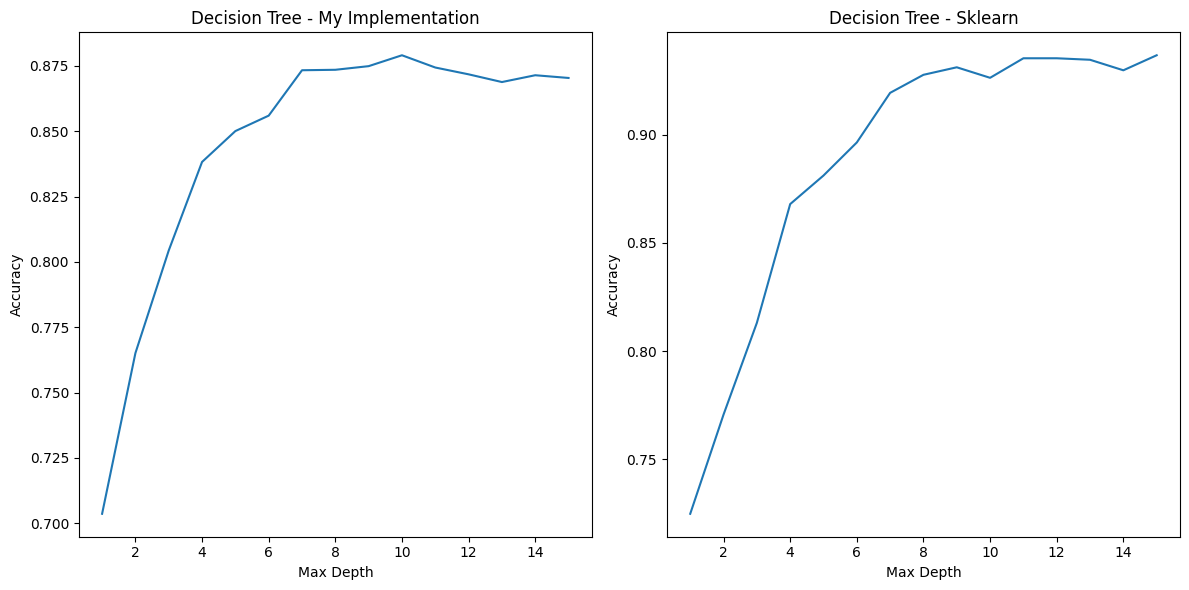

In [13]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Decision Tree - My Implementation
axs[0].plot(range(1, 16), dec_tree_accuracies)
axs[0].set_xlabel("Max Depth")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Decision Tree - My Implementation")

# Decision Tree - Sklearn
axs[1].plot(range(1, 16), dec_tree_accuracies_sklearn)
axs[1].set_xlabel("Max Depth")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Decision Tree - Sklearn")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
